# Ukraine Russia War Twitter Sentiment Analysis using Python

EN:Today is the 19th day of war between Russia and Ukraine. Many countries are supporting Ukraine by introducing economic sanctions on Russia. There are a lot of tweets about the Ukraine and Russia war where people tend to update about the ground truths, what they feel about it, and who they are supporting. So if you want to analyze the sentiments of people over the Ukraine and Russian War, this article is for you. In this article, I will take you through the task of Ukraine and Russia war Twitter Sentiment Analysis using Python.
ES: No voy a traducir, comento que en este projecto vamos a usar el "SentimentIntensityAnalyzer" de "nltk.sentiment.vader" tambien stopwords. Abajo comento y pongo link para entender estas librerias.

In [26]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer # esta libreria analiza si un comentario es positivo negatico o neutro "https://unipython.com/analisis-de-sentimientos-con-textblob-y-vader/""
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk # El Natural Language Toolkit (NLTK) es un conjunto de librerías y programas para Python que nos permiten lleva a cabo muchas tareas relacionadas con el Procesamiento del Lenguaje Natural.
import re #Este módulo proporciona operaciones de coincidencia de expresiones regulares similares a las encontradas en Perl.
from nltk.corpus import stopwords #Una vez instalado nltk debemos descargar los diccionarios de palabras que necesitamos, para este caso las stopwords, que son las palabras conectoras que repetimos con frecuencia en un idioma
import string

data = pd.read_csv("Russia vs Ukraine Tweets Dataset.csv")
print(data.head())

                    id      conversation_id               created_at  \
0  1628557434615742464  1628557434615742464  2023-02-23 00:48:44 UTC   
1  1628557428403970048  1627834811178950656  2023-02-23 00:48:42 UTC   
2  1628557427280084992  1628556620526387202  2023-02-23 00:48:42 UTC   
3  1628557423815323651  1628498646277693440  2023-02-23 00:48:41 UTC   
4  1628557422489993216  1628557422489993216  2023-02-23 00:48:41 UTC   

         date      time  timezone              user_id      username  \
0  2023-02-23  00:48:44         0  1575192262467895298    asstsecenr   
1  2023-02-23  00:48:42         0           3076716646    og_obi_wan   
2  2023-02-23  00:48:42         0   830538315413663744      geraltka   
3  2023-02-23  00:48:41         0           1131874772  koenig_jakob   
4  2023-02-23  00:48:41         0  1591840761296871424       usaacey   

                                    name place  ... geo source user_rt_id  \
0     Assistant Secretary Geoffrey Pyatt   NaN  ... NaN  

In [27]:
print(data.columns)


Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [ ]:
# EN:We only need three columns for this task (username, tweet, and language); I will only select these columns and move forward
# ES: Solo necesitamos estas tres columnas para esta tarea (username, tweet, and language)

In [29]:
data = data[["username", "tweet", "language"]]


In [ ]:
#buscamos datos nulos

In [30]:
data.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [ ]:
#¿en que idiomas están los twets?

In [31]:
data["language"].value_counts()


en     8723
pt      522
it      241
qme     117
in       95
und      52
ja       41
ca       37
es       31
ru       29
qam      14
de       11
fr       10
nl        9
fi        6
pl        5
et        5
ar        5
zh        5
ro        4
cs        4
hi        4
qht       4
ko        4
zxx       4
tl        3
vi        3
uk        3
ht        2
tr        2
sr        1
th        1
da        1
cy        1
fa        1
ta        1
Name: language, dtype: int64

So most of the tweets are in English. Let’s prepare this data for the task of sentiment analysis. Here I will remove all the links, punctuation, symbols and other language errors from the tweets

In [32]:
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text): #limpiamos texto de elementos que no nos van a servir para la nube de palabras.
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chemaboss\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [ ]:
# generamos la nube de palabras.

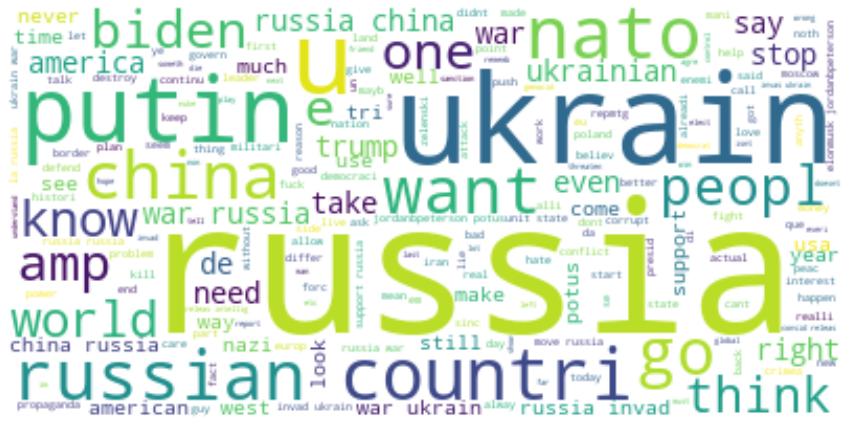

In [33]:
text = " ".join(i for i in data.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

EN:Now I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the tweets:
ES:Añadimos tres columnas mas al dateset como Positivo, Negativo o Neutro calculado las marcas de sertimiento.

In [34]:
nltk.download('vader_lexicon') # Se descarga la la libreria VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["tweet"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["tweet"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["tweet"]]
data = data[["tweet", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\chemaboss\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0  week  year sinc russia fullscal invas ukrain a...     0.182     0.071   
1  generallmao ashtarakcii dikranterzian hovikyer...     0.000     0.270   
2  reuter car maker realli stop nonsens focus dev...     0.094     0.094   
3  reshetz wake air raid siren today programm rad...     0.112     0.435   
4  vladimir putin address feder assembl russia fe...     0.000     0.135   

   Neutral  
0    0.747  
1    0.730  
2    0.812  
3    0.454  
4    0.865  


EN:Now let’s have a look at the most frequent words used by people with positive sentiments
ES:Ahora haremos una nube de palabras con los sentimientos positivos.

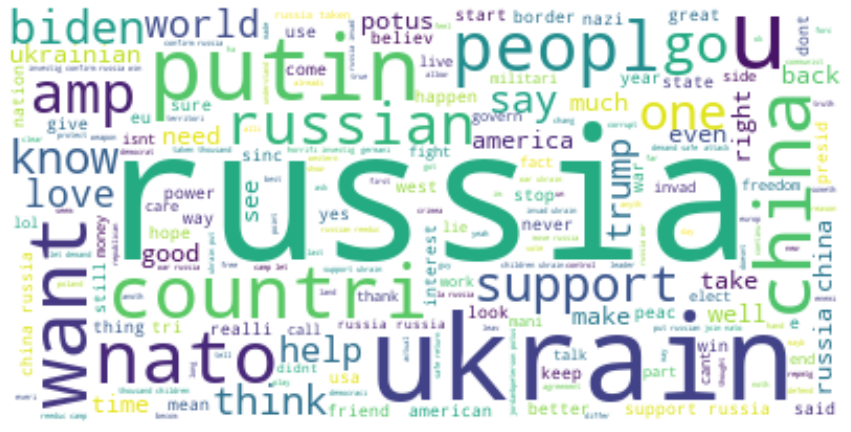

In [36]:
positive =' '.join([i for i in data['tweet'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

EN:Now let’s have a look at the most frequent words used by people with negative sentiments
ES:Ahora haremos lo mismo con sentimientos negativos.

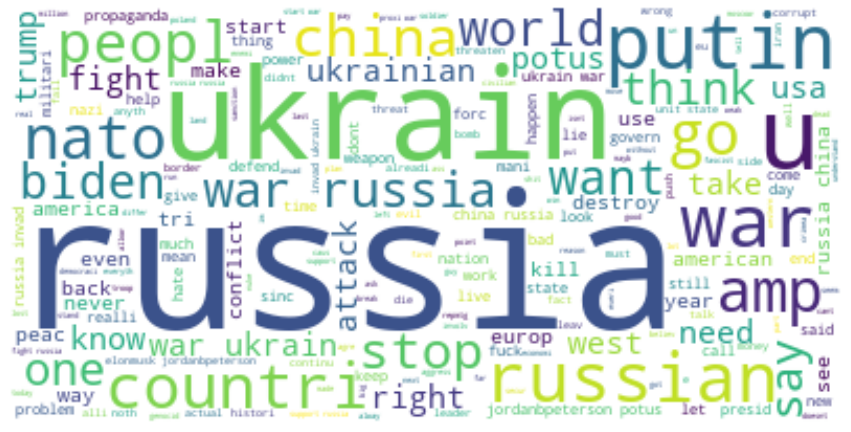

In [37]:
negative =' '.join([i for i in data['tweet'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()